In [ ]:
def cst(f):
  fmin = amin(f) # the min value in an array
  fmax = amax(f) # the max value in an array
  return (f-fmin)/(fmax-fmin)

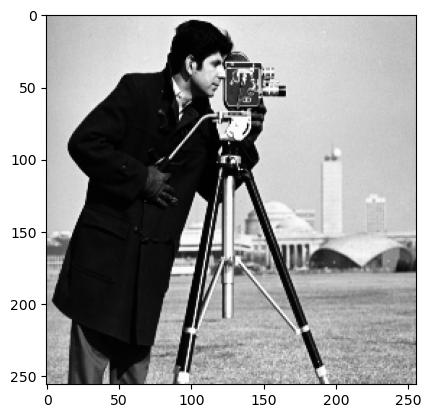

In [18]:
from pylab import *

a = imread("C:\\Users\\ch.en.u4aie22038\\Desktop\\22038_SEM VI\\CV\\Images\\cameraman.png")

clf(); imshow(a,vmin=0,vmax=1,cmap=cm.gray)


(0.0, 1.0)

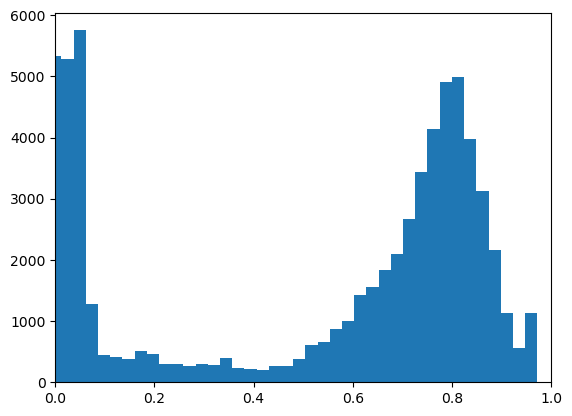

In [19]:
h, be = histogram(a.flatten(), bins=40)

clf(); bar( be[0:-1], h, width=diff(be)[0] ); xlim( (0,1) )

C:\Users\ch.en.u4aie22038\AppData\Local\Temp\ipykernel_19880\3709425647.py:22: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom


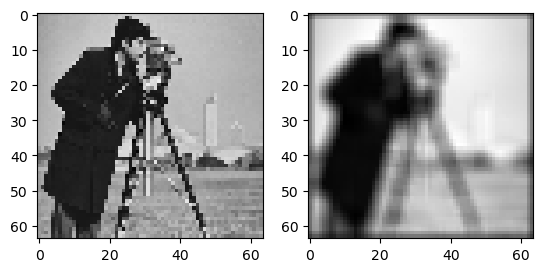

In [20]:
def linfilter1(f, w):
  g = empty(f.shape, dtype=f.dtype)  # the resulting image
  M,N = f.shape
  K,L = (array(w.shape)-1)//2

  def value(i,j):
    """The function returning the value f[i,j] in case
    (i,j) in an index 'in the image', otherwise it return 0"""
    if i<0 or i>=M or j<0 or j>=N:
      return 0
    return f[i,j]

  for j in range(N):
    for i in range(M):
      summed = 0
      for k in range(-K,K+1):
        for l in range(-L,L+1):
          summed += value(i+k,j+l) * w[k+K,l+L]
      g[i,j] = summed
  return g

from scipy.ndimage.interpolation import zoom
from pylab import *; rcParams['savefig.bbox'] = 'tight'

a = imread('images/cameraman.png')

f = zoom(a, 0.25)

g = linfilter1(f, ones((5,5))/25)

subplot(1,2,1)
imshow(f); gray()
subplot(1,2,2)
imshow(g)

C:\Users\ch.en.u4aie22038\AppData\Local\Temp\ipykernel_19880\3873510757.py:15: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom


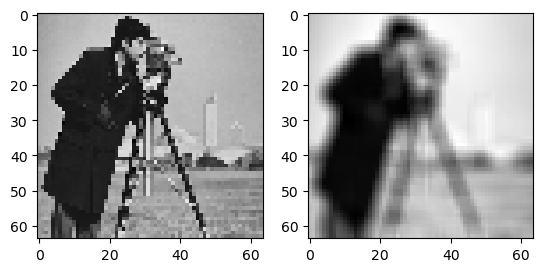

In [21]:
def linfilter2(f, w):
  """Linear Correlation based on neigborhood processing without loops"""
  g = empty(f.shape, dtype=f.dtype)
  M,N = f.shape
  K,L = (array(w.shape)-1)//2

  for j in range(N):
    for i in range(M):
      ii = minimum(M-1, maximum(0, arange(i-K, i+K+1)))
      jj = minimum(N-1, maximum(0, arange(j-L, j+L+1)))
      nbh = f[ ix_(ii,jj) ]
      g[i,j] = ( nbh * w ).sum()
  return g
  
from scipy.ndimage.interpolation import zoom
from pylab import *; rcParams['savefig.bbox'] = 'tight'

a = imread('images/cameraman.png')

f = zoom(a, 0.25)

g = linfilter2(f, ones((5,5))/25)

subplot(1,2,1)
imshow(f); gray()
subplot(1,2,2)
imshow(g)

C:\Users\ch.en.u4aie22038\AppData\Local\Temp\ipykernel_19880\7919720.py:20: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom


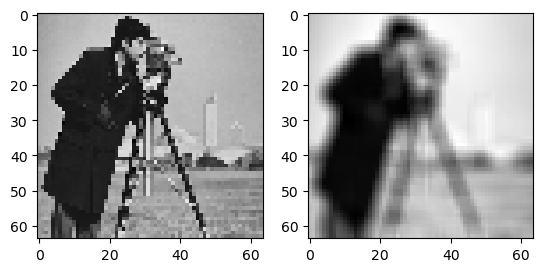

In [22]:
def linfilter3(f, w):
  """Linear Correlation using Translates of Images"""

  M,N = f.shape
  K,L = (array(w.shape)-1)//2

  di,dj = meshgrid(arange(-L,L+1), arange(-K,K+1))
  didjw = zip( di.flatten(), dj.flatten(), w.flatten() )
  
  def translate(di,dj):
    ii = minimum(M-1, maximum(0, di+arange(M)))
    jj = minimum(N-1, maximum(0, dj+arange(N)))
    return f[ ix_(ii, jj) ]

  r = 0*f;
  for di, dj, weight in didjw:
    r += weight*translate(di,dj)
  return r
  
from scipy.ndimage.interpolation import zoom
from pylab import *; rcParams['savefig.bbox'] = 'tight'

a = imread('images/cameraman.png')

f = zoom(a, 0.25)

g = linfilter3(f, ones((5,5))/25)

subplot(1,2,1)
imshow(f); gray()
subplot(1,2,2)
imshow(g)

In [ ]:
def linfilter4(f, w):
  return correlate(f, w, mode='nearest')

from scipy.ndimage.interpolation import zoom
from pylab import *; rcParams['savefig.bbox'] = 'tight'

a = imread('images/cameraman.png')

f = zoom(a, 0.25)

g = linfilter4(f, ones((5,5))/25)

subplot(1,2,1)
imshow(f); gray()
subplot(1,2,2)
imshow(g)